In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community as cmt
from collections import defaultdict
from itertools import count
import random

Modularity: -0.249129285140188


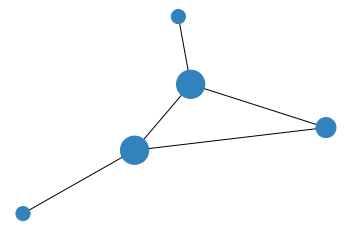

Modularity: -0.249129285140188


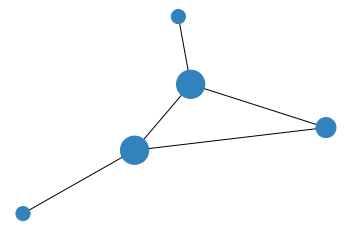

Modularity: -0.249129285140188


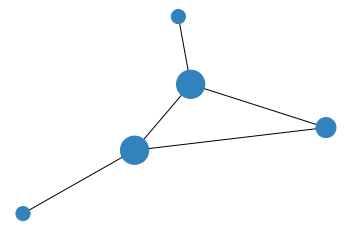

Modularity: 0.0561742128621184


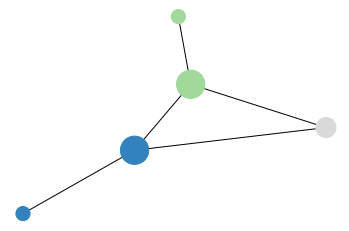

Modularity: 0.0561742128621184


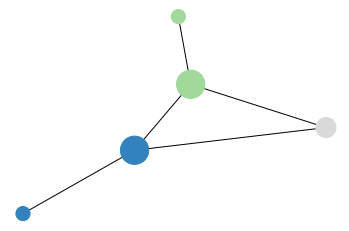

Modularity: 0.0561742128621184


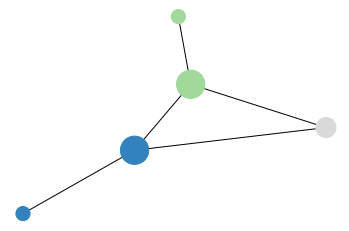

Modularity: 0.0561742128621184


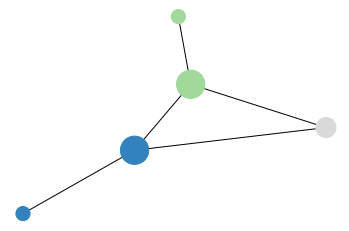

Modularity: 0.058888280585679575


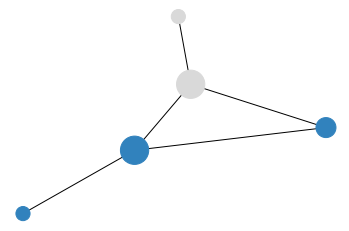

Modularity: 0.058888280585679575


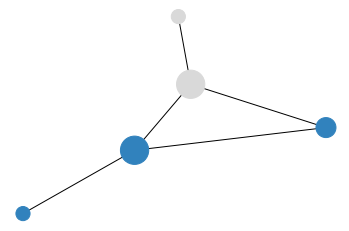

Modularity: 0.09262192920127202


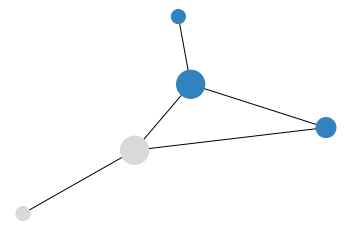

Modularity: 0.058888280585679575


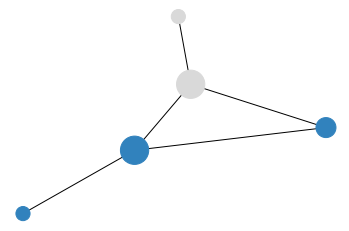

In [25]:
def DetectCommunities(G, CommunityType='?'):
    '''
    Detect communities in graph through Louvain's method.

    Input arguments:    Graph;    networkx graph object that's goingto be used to detect communities.
    Output:                Graph with nodes labelled for each community.
                         Modularity of given partition employed as community guideline.
    '''
    #   Calculate communities for graph
    Partition = cmt.best_partition(G, weight = 'Similarity', resolution = float(CommRes))                                                                                                                 
    Modularity = cmt.modularity(Partition, G)
    CommunitiesList = set([id for n,id in Partition.items()])
    
    #    Create a histogram of the best partition
    CommunitiesHistogram = defaultdict(list)
    for N, ID in Partition.items():
        CommunitiesHistogram[ID].append(N)
        
    #    Merge all communities with one lone member
    Loners = []
    for ID in CommunitiesList:
        if len(CommunitiesHistogram[ID]) == 1:
            Loners.append(*CommunitiesHistogram[ID])

    #    Change ID for lone members
    for N, ID in Partition.items():
        if N in Loners:
            Partition[N] = 'Loners'
            
    #    Assign community ID to each node in graph
    for Node, CommunityID in Partition.items():
        G.node[Node]['CommunityID'] = CommunityType+str(CommunityID)
        
    print('Modularity:', Modularity)
    return Partition, Modularity


G = nx.gnp_random_graph(5,0.6)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,100)
pos = nx.spring_layout(G, scale=10,k=1, iterations = 10000)
d = dict(G.degree)

for CommRes in [0.1*x for x in range(0,11)]:
    Partition, Modularity = DetectCommunities(G)
    
    
    groups = set(nx.get_node_attributes(G,'CommunityID').values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.node[n]['CommunityID']] for n in nodes]
    plt.cla()
    nx.draw(G, pos, node_size=[100*(2**v) for v in d.values()],node_color=colors, cmap=plt.cm.tab20c)
    plt.show()
    #plt.savefig('Red_{0:.2f}.png'.format(CommRes),dpi=300)
    